<a href="https://colab.research.google.com/github/ArmandoActuaria524/University_Projects/blob/main/Proyecto_VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import chi2

In [2]:
np.set_printoptions(precision = 8, suppress = True) #Evitar notacion Cientifica

##Obtenga un histórico de precios de 5 años y con esta información estime rendimientosanuales y la desviación estándar anual, además obtenga las matrices Var-Cov y de correlaciones de los 5 activos para rendimientos anuales

In [3]:
emisora = ['GFNORTEO.MX','GRUMAB.MX','AAPL.MX','GFINBURO.MX','TSLA.MX']
fi = '2019-04-3'
ff = '2024-04-4'

In [4]:
df = yf.download(emisora, start = fi, end = ff)['Close'].reset_index()
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)
df

[*********************100%%**********************]  5 of 5 completed


Ticker,Date,AAPL.MX,GFINBURO.MX,GFNORTEO.MX,GRUMAB.MX,TSLA.MX
0,2019-04-03,937.869995,27.120001,108.949997,198.070007,373.556000
1,2019-04-04,936.052490,27.400000,112.760002,198.869995,343.124664
2,2019-04-05,938.015015,27.740000,116.150002,198.029999,349.873322
3,2019-04-08,949.257507,27.510000,118.830002,199.100006,346.000000
4,2019-04-09,945.250000,28.209999,118.599998,201.029999,343.333344
...,...,...,...,...,...,...
1254,2024-03-26,2834.040039,50.619999,177.440002,305.940002,2963.429932
1255,2024-03-27,2874.429932,51.070000,176.660004,311.910004,2980.020020
1256,2024-04-01,2827.209961,50.939999,175.679993,310.369995,2893.860107
1257,2024-04-02,2799.780029,51.070000,179.139999,314.329987,2754.860107


#a)Rendimientos continuos




**Usaremos** los rendimientos diarios continuos, lo cuales vamos a calcular de la siguiente manera:

$r_t = Ln\left(\frac{Pt}{P_{t-1}}\right)\cdot 250$

In [5]:
df.columns = ['Fecha','APPLE', 'INBURSA' ,'BANORTE','GRUMA','TESLA']

In [6]:
for i in df.columns[1:]:
  df[i + '_rend'] = (np.log(df[i]/df[i].shift(1)))

In [7]:
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)

In [8]:
df

,Fecha,APPLE,INBURSA,BANORTE,GRUMA,TESLA,APPLE_rend,INBURSA_rend,BANORTE_rend,GRUMA_rend,TESLA_rend
0,2019-04-04,936.052490,27.400000,112.760002,198.869995,343.124664,-0.001940,0.010272,0.034373,0.004031,-0.084974
1,2019-04-05,938.015015,27.740000,116.150002,198.029999,349.873322,0.002094,0.012332,0.029621,-0.004233,0.019477
2,2019-04-08,949.257507,27.510000,118.830002,199.100006,346.000000,0.011914,-0.008326,0.022811,0.005389,-0.011132
3,2019-04-09,945.250000,28.209999,118.599998,201.029999,343.333344,-0.004231,0.025127,-0.001937,0.009647,-0.007737
4,2019-04-10,940.750000,28.350000,117.040001,201.279999,348.333344,-0.004772,0.004951,-0.013241,0.001243,0.014458
...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-03-26,2834.040039,50.619999,177.440002,305.940002,2963.429932,-0.010275,0.002968,0.042599,0.020407,0.028897
1254,2024-03-27,2874.429932,51.070000,176.660004,311.910004,2980.020020,0.014151,0.008851,-0.004406,0.019326,0.005583
1255,2024-04-01,2827.209961,50.939999,175.679993,310.369995,2893.860107,-0.016564,-0.002549,-0.005563,-0.004950,-0.029339
1256,2024-04-02,2799.780029,51.070000,179.139999,314.329987,2754.860107,-0.009749,0.002549,0.019504,0.012678,-0.049225


Posteriormente calculamos los rendimientos anuales

In [9]:
#Vector de rendimientos anuales
retornos =  df[['APPLE_rend','INBURSA_rend' ,'BANORTE_rend','GRUMA_rend','TESLA_rend']].mean().values
retornos

rend_anual=pd.DataFrame(retornos,columns=['Vector de rendimientos anuales'],index=['E_APPLE','E_INBURSA'	,'E_BANORTE',	'E_GRUMA','E_TESLA'])
rend_anual

,Vector de rendimientos anuales
E_APPLE,0.000872
E_INBURSA,0.000489
E_BANORTE,0.000390
E_GRUMA,0.000369
E_TESLA,0.001596


In [10]:
#Desviaciones estandar anuales

desviacion_estandar = df[['APPLE_rend','INBURSA_rend' ,'BANORTE_rend','GRUMA_rend','TESLA_rend']].std().values

desv_anual=pd.DataFrame(desviacion_estandar,columns=['Desviaciones estandar anuales'],index=['Sigma_APPLE','Sigma_INBURSA'	,'Sigma_BANORTE',	'Sigma_GRUMA','Sigma_TESLA'])
desv_anual

,Desviaciones estandar anuales
Sigma_APPLE,0.018278
Sigma_INBURSA,0.022315
Sigma_BANORTE,0.023192
Sigma_GRUMA,0.016759
Sigma_TESLA,0.039639


In [11]:
#Matriz de Varianzas y covarianza
matriz_var = df[['APPLE_rend','INBURSA_rend' ,'BANORTE_rend','GRUMA_rend','TESLA_rend']].cov().values
mvc=pd.DataFrame(matriz_var,index=['APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA'],columns=['APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA'])

mvc


,APPLE,INBURSA,BANORTE,GRUMA,TESLA
APPLE,0.000334,0.000044,0.000044,0.000033,0.000307
INBURSA,0.000044,0.000498,0.000217,0.000090,0.000069
BANORTE,0.000044,0.000217,0.000538,0.000056,0.000109
GRUMA,0.000033,0.000090,0.000056,0.000281,0.000065
TESLA,0.000307,0.000069,0.000109,0.000065,0.001571


In [12]:
#Recortamos el dataframe para utilizar solamente los rendimientos diarios
corr_rend=df.iloc[:,6:14]
corr_rend.head()

,APPLE_rend,INBURSA_rend,BANORTE_rend,GRUMA_rend,TESLA_rend
0,-0.001940,0.010272,0.034373,0.004031,-0.084974
1,0.002094,0.012332,0.029621,-0.004233,0.019477
2,0.011914,-0.008326,0.022811,0.005389,-0.011132
3,-0.004231,0.025127,-0.001937,0.009647,-0.007737
4,-0.004772,0.004951,-0.013241,0.001243,0.014458


In [13]:
#Calculamos la matriz de correlaciones
c=corr_rend.corr()
c.columns = [ 'APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA']
c.index = [ 'APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA']
c

,APPLE,INBURSA,BANORTE,GRUMA,TESLA
APPLE,1.000000,0.106656,0.104083,0.108780,0.423472
INBURSA,0.106656,1.000000,0.418668,0.241124,0.077638
BANORTE,0.104083,0.418668,1.000000,0.143804,0.118401
GRUMA,0.108780,0.241124,0.143804,1.000000,0.097191
TESLA,0.423472,0.077638,0.118401,0.097191,1.000000


##-Para cada activo determine una función de utilidad nominal por separado. Ordene sus activos por orden alfabético y en ese orden numérelos para determinar:

##Función VaR Historico

In [14]:
def VaR_historico(emisora, color, alpha_VaR):

    data = df[['Fecha',emisora]].copy()

    data['Rendimiento'] = np.log(data[emisora]/data[emisora].shift(1))
    data.dropna(inplace =True)
    data.reset_index(inplace = True, drop = True)

    data['L'] = -data['Rendimiento']

    #VaR Historico
    VaR_Historico =( np.percentile(data['L'], alpha_VaR))
    print("El VaR Histórico anual al " + str((alpha_VaR)) + '% es:', str(np.round(VaR_Historico*100,6)) + '%')


    #Grafico de Histograma de L
    plt.figure(figsize=(8,6))
    sns.histplot(data=data['L'], kde= True,color = color)
    plt.vlines(x=VaR_Historico, ymin = 0, ymax=150, color = 'blue',label='VaR_Historico')
    plt.xlabel('L')
    plt.ylabel('Frecuencia')
    plt.title('Histograma | L de: ' + emisora)
    plt.legend()
    plt.show()



    return data

##Función VaR parámetrico

In [15]:
def VaR_parametrico(emisora, color, alpha_VaR):

    data = df[['Fecha',emisora]].copy()

    data[emisora + '_rend'] = np.log(data[emisora]/data[emisora].shift(1))
    data.dropna(inplace =True)
    data.reset_index(inplace = True, drop = True)

    data['L'] = -data[emisora + '_rend']

    #VaR Paramétrico
    mu = np.mean(data['L'])
    sigma = np.std(data['L'])
    cuantil = norm.ppf(alpha_VaR)
    VaR_Parametrico=(mu - sigma*cuantil)
    print("El VaR Paramétrico Anual al " + str((1-alpha_VaR)*100) + '% es:', str(np.round(VaR_Parametrico*100,6)) + '%')



    #Grafico de Histograma de L
    plt.figure(figsize=(8,6))
    sns.histplot(data=data['L'], kde= True,color = color)
    plt.vlines(x=VaR_Parametrico, ymin = 0, ymax=150, color = 'red',label='VaR_Parametrico')
    plt.xlabel('L')
    plt.ylabel('Frecuencia')
    plt.title('Histograma | L de: ' + emisora)
    plt.legend()
    plt.show()



    return data

##Función VaR Montecarlo

In [16]:
def VaR_Montecarlo(emisora,alpha):
    data = df[['Fecha',emisora]].copy()

    data['rend']  = np.log(data[emisora]/data[emisora].shift(1))
    data.dropna(inplace =True)
    data.reset_index(inplace = True, drop = True)


    mu = np.mean(data['rend'])
    sigma = np.std(data['rend'])
    simulaciones = pd.DataFrame()
    for serie in range(100):
      simulacion = [data[emisora].iloc[-1]]

    new_df = pd.DataFrame()
    new_df['Sim_Z']=np.random.standard_normal(size=10000)

    new_df['S1'] = new_df['Sim_Z'].map(lambda x : data[emisora].iloc[-1]*np.exp((mu-(sigma**2)/2) + sigma*x))

    new_df['Close_P&L'] = new_df['S1'].map(lambda x : -(x-data[emisora].iloc[-1]))

    np.mean(new_df['S1'])

    VaR_montecarlo =(np.percentile(new_df['Close_P&L'],alpha))
    print("El VaR Monte Carlo al ",(alpha), "% anual para ",emisora," es: $"+str(np.round(VaR_montecarlo,4)))
    print("En porcentaje",(np.percentile(new_df['Close_P&L'],alpha)/ data[emisora].iloc[-1])*100,"%")
    print('Predicción precio: ',np.mean(new_df['S1']))

    plt.figure(figsize=(8,6))
    sns.histplot(data =new_df['Close_P&L'], kde = True, color = 'green', bins = 50)
    plt.title("Histograma | P&L de: "+emisora)
    plt.vlines(x=VaR_montecarlo, ymin = 0, ymax=700, color = 'red',label='VaR_montecarlo')
    plt.xlabel("P&L")
    plt.ylabel("Frecuencia")
    plt.show()

##ACTIVO 1. APPLE

Funcion de utilidad Nominal

In [17]:
L_Banorte=pd.DataFrame(-df['APPLE_rend'])
L_Banorte.columns=['L_APPLE_rend']
for i in df['APPLE']:
  L_Banorte['L_APPLE_monetaria'] =(100*df['APPLE']-100*df['APPLE'].shift(1))*(-1)
L_Banorte

,L_APPLE_rend,L_APPLE_monetaria
0,0.001940,NaN
1,-0.002094,-196.252441
2,-0.011914,-1124.249268
3,0.004231,400.750732
4,0.004772,450.000000
...,...,...
1253,0.010275,2927.001953
1254,-0.014151,-4038.989258
1255,0.016564,4721.997070
1256,0.009749,2742.993164


 VaR histórico anual a un nivel de confianza del 95%

El VaR Histórico anual al 95% es: 2.77576%


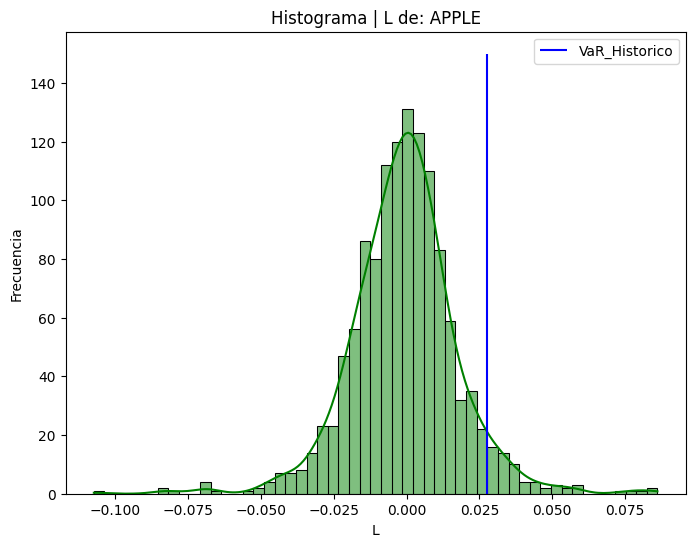

In [18]:
A_vaR_95=VaR_historico('APPLE','green',95)

 VaR paramétrico a un nivel de confianza del 99%





El VaR Paramétrico Anual al 99.0% es: 4.164563%


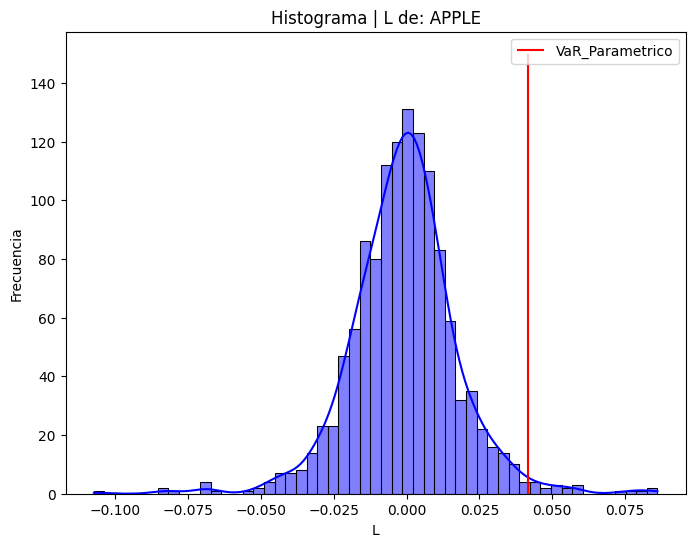

In [19]:
A_vaR_99=VaR_parametrico('APPLE','blue',0.01)

##ACTIVO 2. BANORTE

Funcion de utilidad Nominal

In [20]:
L_Banorte=pd.DataFrame(-df['BANORTE_rend'])
L_Banorte.columns=['L_Banorte_rend']
for i in df['BANORTE']:
  L_Banorte['L_BANORTE_monetaria'] =(100*df['BANORTE']-100*df['BANORTE'].shift(1))*(-1)
L_Banorte

,L_Banorte_rend,L_BANORTE_monetaria
0,-0.034373,NaN
1,-0.029621,-338.999939
2,-0.022811,-268.000031
3,0.001937,23.000336
4,0.013241,155.999756
...,...,...
1253,-0.042599,-740.000916
1254,0.004406,77.999878
1255,0.005563,98.001099
1256,-0.019504,-346.000671


 VaR histórico anual a un nivel de confianza del 95%

El VaR Histórico anual al 95% es: 3.67195%


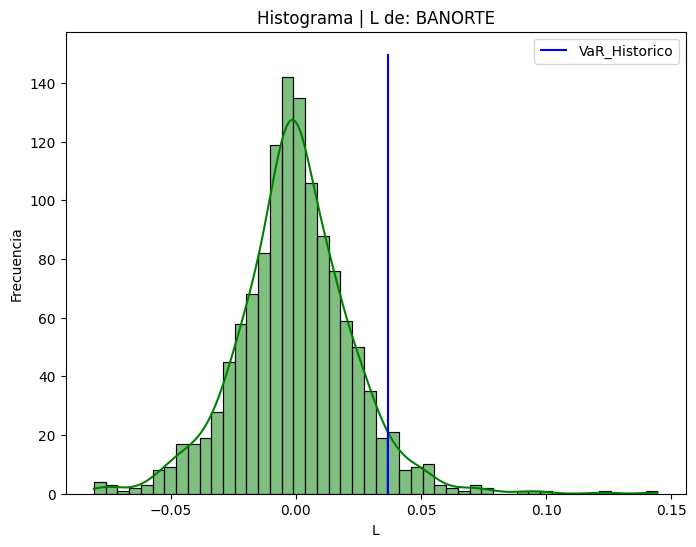

In [21]:
B_vaR_95=VaR_historico('BANORTE','green',95)

 VaR paramétrico a un nivel de confianza del 99%





El VaR Paramétrico Anual al 99.0% es: 5.35443%


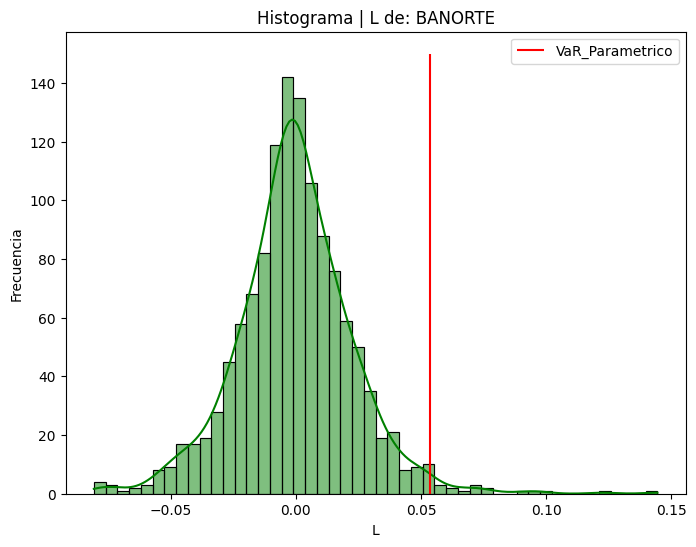

In [22]:
B_vaR_99=VaR_parametrico('BANORTE','green',0.01)

##ACTIVO 3. INBURSA

Funcion de utilidad Nominal

In [23]:
L_INBURSA=pd.DataFrame(-df['INBURSA_rend'])
L_INBURSA.columns=['L_INBURSA_rend']
for i in df['INBURSA']:
  L_INBURSA['L_INBURSA_monetaria'] =(100*df['INBURSA']-100*df['INBURSA'].shift(1))*(-1)
L_INBURSA

,L_INBURSA_rend,L_INBURSA_monetaria
0,-0.010272,NaN
1,-0.012332,-34.000015
2,0.008326,22.999954
3,-0.025127,-69.999886
4,-0.004951,-14.000130
...,...,...
1253,-0.002968,-14.999771
1254,-0.008851,-45.000076
1255,0.002549,13.000107
1256,-0.002549,-13.000107


VaR histórico anual a un nivel de confianza del 99.5%

El VaR Histórico anual al 99.5% es: 6.85931%


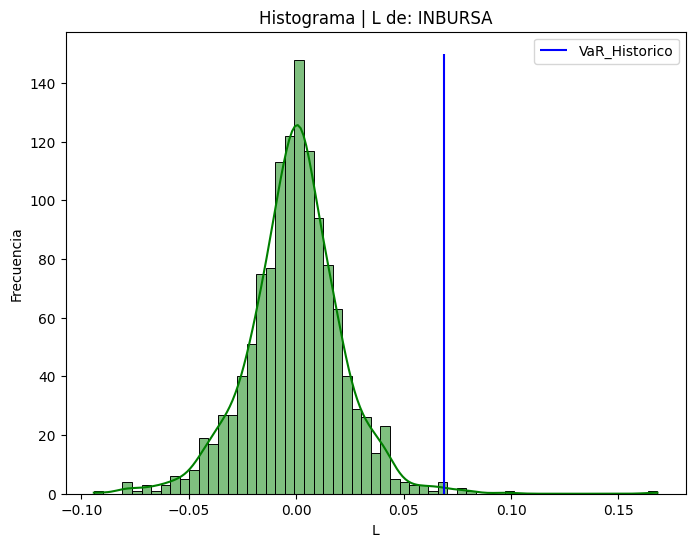

In [24]:
I_Var_99_5=VaR_historico('INBURSA','green',99.5)

VaR Monte Carlo a un nivel de confianza del 95%

El VaR Monte Carlo al  95 % anual para  INBURSA  es: $1.8025
En porcentaje 3.590553760471486 %
Predicción precio:  50.21713954632604


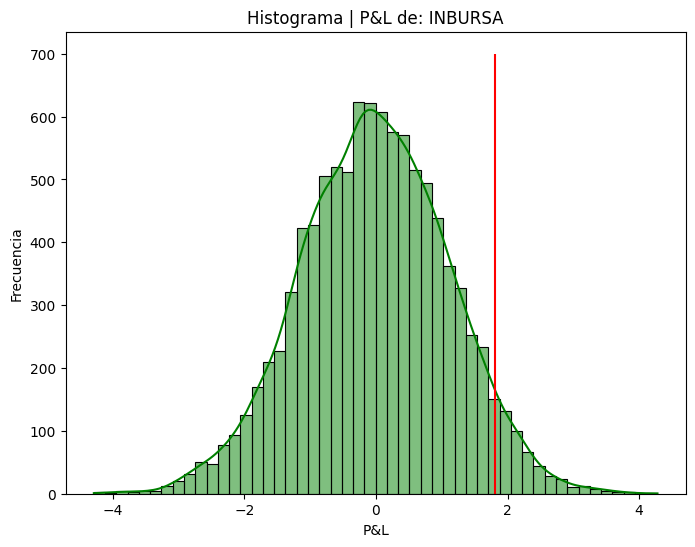

In [25]:
VaR_m_Inbursa= VaR_Montecarlo('INBURSA',95)

##Activo 4. GRUMA

Funcion de utilidad Nominal

In [26]:
L_GRUMA=pd.DataFrame(-df['GRUMA_rend'])
L_GRUMA.columns=['L_GRUMA_rend']
for i in df['GRUMA']:
  L_GRUMA['L_GRUMA_monetaria'] =(100*df['GRUMA']-100*df['GRUMA'].shift(1))*(-1)
L_GRUMA

,L_GRUMA_rend,L_GRUMA_monetaria
0,-0.004031,NaN
1,0.004233,83.999634
2,-0.005389,-107.000732
3,-0.009647,-192.999268
4,-0.001243,-25.000000
...,...,...
1253,-0.020407,-617.999268
1254,-0.019326,-597.000122
1255,0.004950,154.000854
1256,-0.012678,-395.999146


 VaR paramétrico anual a un nivel de confianza del 90%



El VaR Paramétrico Anual al 90.0% es: 2.111125%


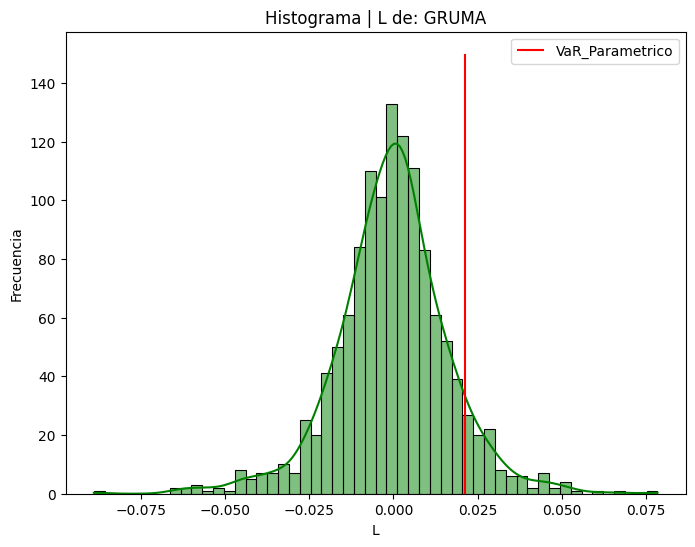

In [27]:
Gruma_vaR_90=VaR_parametrico('GRUMA','green',0.1)

 VaR Monte Carlo a un nivel de confianza del 95%

El VaR Monte Carlo al  95 % anual para  GRUMA  es: $8.5189
En porcentaje 2.703380322220335 %
Predicción precio:  315.2331305930629


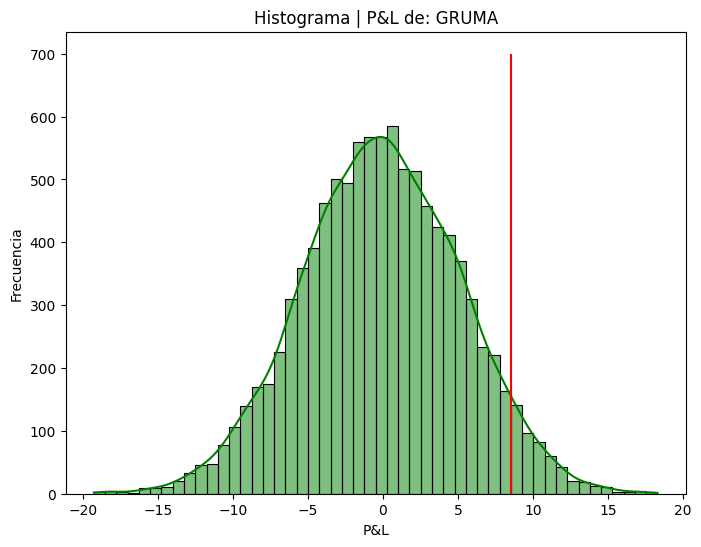

In [28]:
Gruma_vaR_95=VaR_Montecarlo('GRUMA',95)

##ACTIVO 5. TESLA

Funcion de utilidad Nominal

In [29]:
L_TESLA=pd.DataFrame(-df['TESLA_rend'])
L_TESLA.columns=['L_TESLA_rend']
for i in df['TESLA']:
  L_TESLA['L_TESLA_monetaria'] =(100*df['TESLA']-100*df['TESLA'].shift(1))*(-1)
L_TESLA

,L_TESLA_rend,L_TESLA_monetaria
0,0.084974,NaN
1,-0.019477,-674.865723
2,0.011132,387.332153
3,0.007737,266.665649
4,-0.014458,-500.000000
...,...,...
1253,-0.028897,-8440.991211
1254,-0.005583,-1659.008789
1255,0.029339,8615.991211
1256,0.049225,13900.000000


 VaR Monte Carlo anual a un nivel de confianza del 99.5%

El VaR Monte Carlo al  99.5 % anual para  TESLA  es: $267.8192
En porcentaje 9.627722793505274 %
Predicción precio:  2786.0054703862684


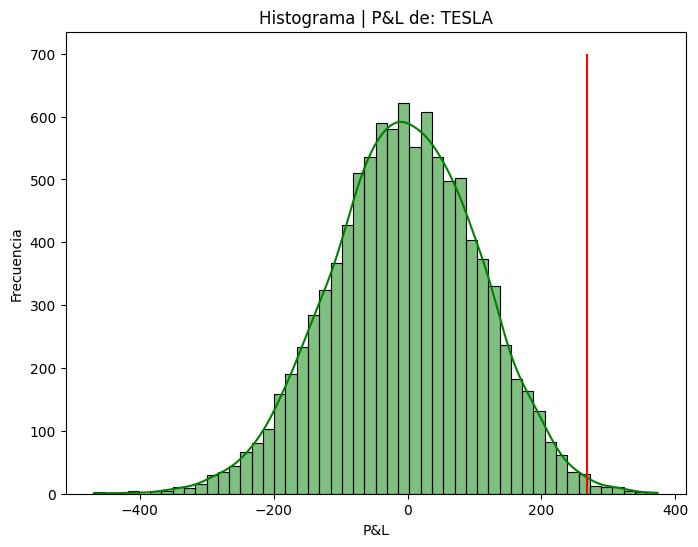

In [30]:
Tesla_vaR_99_5=VaR_Montecarlo('TESLA',99.5)

 VaR histórico anual a un nivel de confianza del 99.5%

El VaR Histórico anual al 99.5% es: 13.855136%


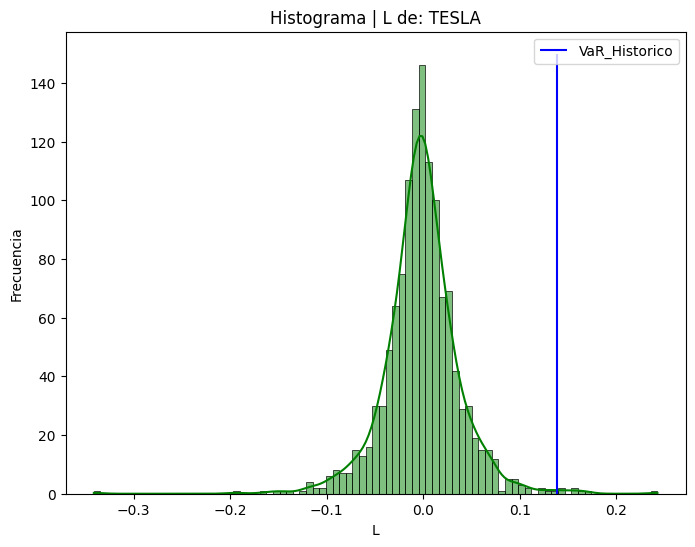

In [31]:
I_Tesla_VaR_99_5= VaR_historico('TESLA','green',99.5)

##7. Forma el portafolio de mínima varianza y determine para el portafolio:


###• VaR histórico anual al 99.5% e interprete

In [32]:
df_1 = yf.download(emisora, start = fi, end = ff)['Close'].reset_index()
df_1['Date'] = pd.to_datetime(df_1['Date'],dayfirst = True)
df_1

[*********************100%%**********************]  5 of 5 completed


Ticker,Date,AAPL.MX,GFINBURO.MX,GFNORTEO.MX,GRUMAB.MX,TSLA.MX
0,2019-04-03,937.869995,27.120001,108.949997,198.070007,373.556000
1,2019-04-04,936.052490,27.400000,112.760002,198.869995,343.124664
2,2019-04-05,938.015015,27.740000,116.150002,198.029999,349.873322
3,2019-04-08,949.257507,27.510000,118.830002,199.100006,346.000000
4,2019-04-09,945.250000,28.209999,118.599998,201.029999,343.333344
...,...,...,...,...,...,...
1254,2024-03-26,2834.040039,50.619999,177.440002,305.940002,2963.429932
1255,2024-03-27,2874.429932,51.070000,176.660004,311.910004,2980.020020
1256,2024-04-01,2827.209961,50.939999,175.679993,310.369995,2893.860107
1257,2024-04-02,2799.780029,51.070000,179.139999,314.329987,2754.860107


In [33]:
df_1.columns = ['Fecha', 'APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA']

In [34]:
for i in df_1.columns[1:]:
  df_1[i + '_rend'] = np.log(df_1[i]/df_1[i].shift(1))

In [35]:
df_1.dropna(inplace = True)
df_1.reset_index(inplace = True, drop = True)

In [36]:
df_1

,Fecha,APPLE,INBURSA,BANORTE,GRUMA,TESLA,APPLE_rend,INBURSA_rend,BANORTE_rend,GRUMA_rend,TESLA_rend
0,2019-04-04,936.052490,27.400000,112.760002,198.869995,343.124664,-0.001940,0.010272,0.034373,0.004031,-0.084974
1,2019-04-05,938.015015,27.740000,116.150002,198.029999,349.873322,0.002094,0.012332,0.029621,-0.004233,0.019477
2,2019-04-08,949.257507,27.510000,118.830002,199.100006,346.000000,0.011914,-0.008326,0.022811,0.005389,-0.011132
3,2019-04-09,945.250000,28.209999,118.599998,201.029999,343.333344,-0.004231,0.025127,-0.001937,0.009647,-0.007737
4,2019-04-10,940.750000,28.350000,117.040001,201.279999,348.333344,-0.004772,0.004951,-0.013241,0.001243,0.014458
...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-03-26,2834.040039,50.619999,177.440002,305.940002,2963.429932,-0.010275,0.002968,0.042599,0.020407,0.028897
1254,2024-03-27,2874.429932,51.070000,176.660004,311.910004,2980.020020,0.014151,0.008851,-0.004406,0.019326,0.005583
1255,2024-04-01,2827.209961,50.939999,175.679993,310.369995,2893.860107,-0.016564,-0.002549,-0.005563,-0.004950,-0.029339
1256,2024-04-02,2799.780029,51.070000,179.139999,314.329987,2754.860107,-0.009749,0.002549,0.019504,0.012678,-0.049225


In [37]:
#Vector de rendimientos diarios
retornos2 =  df_1[['APPLE_rend','INBURSA_rend' ,'BANORTE_rend','GRUMA_rend','TESLA_rend']].mean().values
retornos2

rend_anual2=pd.DataFrame(retornos2,columns=['Vector de rendimientos anuales'],index=['E_APPLE','E_INBURSA'	,'E_BANORTE',	'E_GRUMA','E_TESLA'])
rend_anual2

,Vector de rendimientos anuales
E_APPLE,0.000872
E_INBURSA,0.000489
E_BANORTE,0.000390
E_GRUMA,0.000369
E_TESLA,0.001596


In [38]:
#Matriz de Varianzas y covarianza
matriz_var2 = df_1[['APPLE_rend','INBURSA_rend' ,'BANORTE_rend','GRUMA_rend','TESLA_rend']].cov().values
mvc2=pd.DataFrame(matriz_var2,index=['APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA'],columns=['APPLE','INBURSA' ,'BANORTE','GRUMA','TESLA'])

mvc2

,APPLE,INBURSA,BANORTE,GRUMA,TESLA
APPLE,0.000334,0.000044,0.000044,0.000033,0.000307
INBURSA,0.000044,0.000498,0.000217,0.000090,0.000069
BANORTE,0.000044,0.000217,0.000538,0.000056,0.000109
GRUMA,0.000033,0.000090,0.000056,0.000281,0.000065
TESLA,0.000307,0.000069,0.000109,0.000065,0.001571


In [39]:
#Calculamos el portafolio de mínima varianza
matriz_var_ext2 = np.append(np.append(matriz_var2, [np.array([1,1,1,1,1,])], axis = 0),np.array([[1],[1],[1],[1],[1],[0]]), axis=1)
matriz_var_ext2

array([[0.00033408, 0.0000435 , 0.00004412, 0.00003332, 0.00030681,
        1.        ],
       [0.0000435 , 0.00049794, 0.00021667, 0.00009017, 0.00006867,
        1.        ],
       [0.00004412, 0.00021667, 0.00053788, 0.00005589, 0.00010885,
        1.        ],
       [0.00003332, 0.00009017, 0.00005589, 0.00028087, 0.00006457,
        1.        ],
       [0.00030681, 0.00006867, 0.00010885, 0.00006457, 0.00157122,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        ]])

In [40]:
aux2 = np.array([0,0,0,0,0,1])
aux2

array([0, 0, 0, 0, 0, 1])

In [41]:
#Hacemos la multiplicación de la matriz inversa con el vector auxiliar
#El vector de pesos es el que calculamos pero quitando el último que es el lambda
w_mv2 = np.dot(np.linalg.inv(matriz_var_ext2), aux2)[:-1]
w_mv2

array([ 0.35644914,  0.11740371,  0.14547697,  0.39246461, -0.01179444])

In [42]:
sum(w_mv2) #Confirmamos que si suma 1

1.0

In [43]:
data=pd.DataFrame()


In [44]:
#Creamos la funcion de perdidas y ganancias de cada emisora
data['L_APPLE']=-df_1['APPLE_rend']
data['L_INBURSA']=-df_1['INBURSA_rend']
data['L_BANORTE']=-df_1['BANORTE_rend']
data['L_GRUMA']=-df_1['GRUMA_rend']
data['L_TESLA']=-df_1['TESLA_rend']


In [45]:
#Utilizando el portafolio de mínima varianza y las L de cada emisora creamos la función de péridas y ganancias del portafolio
data['L_PORTAFOLIO']=w_mv2[0]*data['L_APPLE']+w_mv2[1]*data['L_INBURSA']+w_mv2[2]*data['L_BANORTE']+w_mv2[3]*data['L_GRUMA']+w_mv2[4]*data['L_TESLA']
data

,L_APPLE,L_INBURSA,L_BANORTE,L_GRUMA,L_TESLA,L_PORTAFOLIO
0,0.001940,-0.010272,-0.034373,-0.004031,0.084974,-0.008099
1,-0.002094,-0.012332,-0.029621,0.004233,-0.019477,-0.004613
2,-0.011914,0.008326,-0.022811,-0.005389,0.011132,-0.008834
3,0.004231,-0.025127,0.001937,-0.009647,0.007737,-0.005037
4,0.004772,-0.004951,0.013241,-0.001243,-0.014458,0.002729
...,...,...,...,...,...,...
1253,0.010275,-0.002968,-0.042599,-0.020407,-0.028897,-0.010551
1254,-0.014151,-0.008851,0.004406,-0.019326,-0.005583,-0.012961
1255,0.016564,0.002549,0.005563,0.004950,0.029339,0.008609
1256,0.009749,-0.002549,-0.019504,-0.012678,0.049225,-0.005218


El VaR Histórico anual al 99.5% es: $ 0.035315


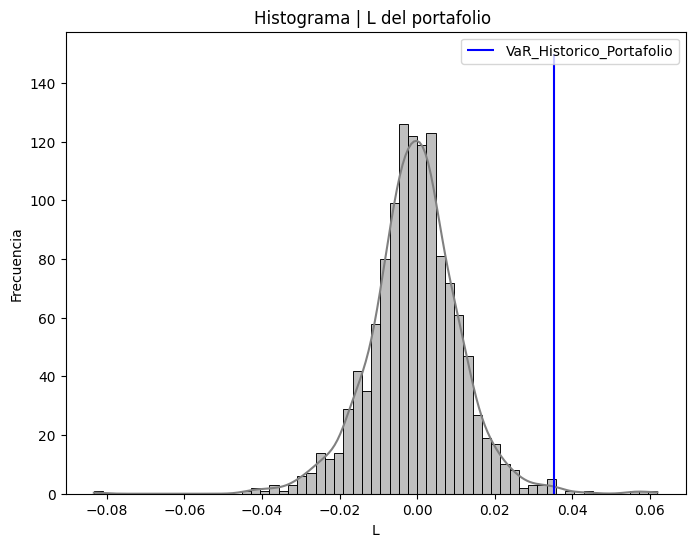

In [72]:
#VaR Historico
VaR_Historico =( np.percentile(data['L_PORTAFOLIO'], 99.5))
print("El VaR Histórico anual al " + str((99.5)) + '% es: $', str(np.round(VaR_Historico,6)))


#Grafico de Histograma de L
plt.figure(figsize=(8,6))
sns.histplot(data=data['L_PORTAFOLIO'], kde= True,color = 'gray')
plt.vlines(x=VaR_Historico, ymin = 0, ymax=150, color = 'blue',label='VaR_Historico_Portafolio')
plt.xlabel('L')
plt.ylabel('Frecuencia')
plt.title('Histograma | L del portafolio ')
plt.legend()
plt.show()

#VaR Montecarlo

In [47]:
#Calculamos la media y la volatilidad de los rendimientos
mu = np.array([np.mean(df_1['APPLE_rend']),np.mean(df_1['INBURSA_rend']),np.mean(df_1['BANORTE_rend']),np.mean(df_1['GRUMA_rend']),np.mean(df_1['TESLA_rend'])])
sigma = np.array([np.std(df['APPLE_rend']),np.std(df['INBURSA_rend']),np.std(df['BANORTE_rend']),np.std(df['GRUMA_rend']),np.std(df['TESLA_rend'])])

In [48]:
mu,sigma

(array([0.00087228, 0.00048946, 0.00038977, 0.0003691 , 0.001596  ]),
 array([0.01827054, 0.02230569, 0.023183  , 0.01675259, 0.03962286]))

In [49]:
data2 = pd.DataFrame()

In [52]:
data2['Z_Apple'] = np.random.standard_normal(size=10000)
data2['Z_Inbursa'] = np.random.standard_normal(size = 10000)
data2['Z_Banorte'] = np.random.standard_normal(size = 10000)
data2['Z_Banorte'] = np.random.standard_normal(size = 10000)
data2['Z_Gruma'] = np.random.standard_normal(size = 10000)
data2['Z_Tesla'] = np.random.standard_normal(size = 10000)

data2

,Z_Apple,Z_Inbursa,Z_Banorte,Z_Gruma,Z_Tesla
0,0.340205,1.757976,0.008453,1.240166,-0.270916
1,0.428891,-1.537499,0.841039,0.251136,-0.054487
2,-0.961715,0.019028,-0.322165,0.905697,-0.895376
3,-3.389343,0.203161,-1.301752,-0.878300,-1.771981
4,0.913217,0.434782,0.312017,1.607922,-0.460069
...,...,...,...,...,...
9995,1.103260,-1.302703,0.586234,1.271596,0.136826
9996,-0.283152,0.908218,-1.087560,-1.431210,-0.142775
9997,0.672236,2.577533,1.195266,-0.324662,0.155351
9998,-2.000762,-0.395136,-0.039335,0.476035,0.368681


In [53]:
cholesky = np.linalg.cholesky(matriz_var2)
cholesky

array([[0.01827781, 0.        , 0.        , 0.        , 0.        ],
       [0.00237999, 0.02218728, 0.        , 0.        , 0.        ],
       [0.00241392, 0.00950661, 0.0210161 , 0.        , 0.        ],
       [0.00182308, 0.00386868, 0.00070021, 0.01618926, 0.        ],
       [0.01678585, 0.00129455, 0.00266561, 0.00167325, 0.03574737]])

In [54]:
np.dot(cholesky,cholesky.T)

array([[0.00033408, 0.0000435 , 0.00004412, 0.00003332, 0.00030681],
       [0.0000435 , 0.00049794, 0.00021667, 0.00009017, 0.00006867],
       [0.00004412, 0.00021667, 0.00053788, 0.00005589, 0.00010885],
       [0.00003332, 0.00009017, 0.00005589, 0.00028087, 0.00006457],
       [0.00030681, 0.00006867, 0.00010885, 0.00006457, 0.00157122]])

In [55]:
matriz_var2

array([[0.00033408, 0.0000435 , 0.00004412, 0.00003332, 0.00030681],
       [0.0000435 , 0.00049794, 0.00021667, 0.00009017, 0.00006867],
       [0.00004412, 0.00021667, 0.00053788, 0.00005589, 0.00010885],
       [0.00003332, 0.00009017, 0.00005589, 0.00028087, 0.00006457],
       [0.00030681, 0.00006867, 0.00010885, 0.00006457, 0.00157122]])

In [59]:
data2.values.T.shape

(5, 10000)

In [60]:
sim = pd.DataFrame(np.dot(cholesky,data2.values.T).T)
sim

,0,1,2,3,4
0,0.006218,0.039814,0.017711,0.027505,0.000400
1,0.007839,-0.033092,0.004094,-0.000512,0.005923
2,-0.017578,-0.001867,-0.008911,0.012757,-0.047469
3,-0.061950,-0.003559,-0.033608,-0.020524,-0.124913
4,0.016692,0.011820,0.012895,0.029596,0.002968
...,...,...,...,...,...
9995,0.020165,-0.026278,0.002599,0.017968,0.025414
9996,-0.005175,0.019477,-0.014906,-0.020934,-0.013975
9997,0.012287,0.058788,0.051246,0.006778,0.022817
9998,-0.036570,-0.013529,-0.009413,0.002503,-0.020225


In [65]:
S0 = df_1.iloc[-1,1:6].values
S0

array([2810.0, 50.20000076293945, 177.89999389648438, 315.1199951171875,
       2781.75], dtype=object)

In [66]:
sim[['S1_Apple','S1_Inbursa','S1_Banorte','S1_Gruma','S1_Tesla']]=S0*np.exp(sim + mu - (sigma**2)/2)
sim

,0,1,2,3,4,S1_Apple,S1_Inbursa,S1_Banorte,S1_Gruma,S1_Tesla
0,0.006218,0.039814,0.017711,0.027505,0.000400,2829.522736,52.25158,181.100818,323.981638,2785.119481
1,0.007839,-0.033092,0.004094,-0.000512,0.005923,2834.113069,48.577651,178.651478,315.030892,2800.546298
2,-0.017578,-0.001867,-0.008911,0.012757,-0.047469,2762.985557,50.118443,176.343068,319.238856,2654.93989
3,-0.061950,-0.003559,-0.033608,-0.020524,-0.124913,2643.067259,50.033697,172.041309,308.789153,2457.090711
4,0.016692,0.011820,0.012895,0.029596,0.002968,2859.313228,50.809117,180.230706,324.660078,2792.281873
...,...,...,...,...,...,...,...,...,...,...
9995,0.020165,-0.026278,0.002599,0.017968,0.025414,2869.262534,48.909813,178.384591,320.906737,2855.667251
9996,-0.005175,0.019477,-0.014906,-0.020934,-0.013975,2797.467265,51.199652,175.289153,308.662345,2745.371535
9997,0.012287,0.058788,0.051246,0.006778,0.022817,2846.746766,53.252464,187.276993,317.335754,2848.259995
9998,-0.036570,-0.013529,-0.009413,0.002503,-0.020225,2711.007433,49.537351,176.254655,315.981982,2728.266103


In [68]:
sim['L_Apple'] = -((sim['S1_Apple']-S0[0])/S0[0])
sim['L_Inbursa'] = -((sim['S1_Inbursa']-S0[1])/S0[1])
sim['L_Banorte'] = -((sim['S1_Banorte']-S0[2])/S0[2])
sim['L_Gruma'] = -((sim['S1_Gruma']-S0[3])/S0[3])
sim['L_Tesla'] = -((sim['S1_Tesla']-S0[4])/S0[4])

sim

,0,1,2,3,4,S1_Apple,S1_Inbursa,S1_Banorte,S1_Gruma,S1_Tesla,L_Apple,L_Inbursa,L_Banorte,L_Gruma,L_Tesla
0,0.006218,0.039814,0.017711,0.027505,0.000400,2829.522736,52.25158,181.100818,323.981638,2785.119481,-0.006948,-0.040868,-0.017992,-0.028121,-0.001211
1,0.007839,-0.033092,0.004094,-0.000512,0.005923,2834.113069,48.577651,178.651478,315.030892,2800.546298,-0.008581,0.032318,-0.004224,0.000283,-0.006757
2,-0.017578,-0.001867,-0.008911,0.012757,-0.047469,2762.985557,50.118443,176.343068,319.238856,2654.93989,0.016731,0.001625,0.008752,-0.013071,0.045586
3,-0.061950,-0.003559,-0.033608,-0.020524,-0.124913,2643.067259,50.033697,172.041309,308.789153,2457.090711,0.059407,0.003313,0.032932,0.02009,0.11671
4,0.016692,0.011820,0.012895,0.029596,0.002968,2859.313228,50.809117,180.230706,324.660078,2792.281873,-0.017549,-0.012134,-0.013101,-0.030274,-0.003786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.020165,-0.026278,0.002599,0.017968,0.025414,2869.262534,48.909813,178.384591,320.906737,2855.667251,-0.02109,0.025701,-0.002724,-0.018364,-0.026572
9996,-0.005175,0.019477,-0.014906,-0.020934,-0.013975,2797.467265,51.199652,175.289153,308.662345,2745.371535,0.00446,-0.019913,0.014676,0.020493,0.013078
9997,0.012287,0.058788,0.051246,0.006778,0.022817,2846.746766,53.252464,187.276993,317.335754,2848.259995,-0.013077,-0.060806,-0.052709,-0.007031,-0.023909
9998,-0.036570,-0.013529,-0.009413,0.002503,-0.020225,2711.007433,49.537351,176.254655,315.981982,2728.266103,0.035229,0.0132,0.009249,-0.002735,0.019227


In [69]:
sim['L_Portafolio'] = w_mv2[0]*sim['L_Apple'] + w_mv2[1]* sim['L_Inbursa'] + w_mv2[2]*sim['L_Banorte']+w_mv2[3]*sim['L_Gruma']+w_mv2[3]*sim['L_Tesla']
sim

,0,1,2,3,4,S1_Apple,S1_Inbursa,S1_Banorte,S1_Gruma,S1_Tesla,L_Apple,L_Inbursa,L_Banorte,L_Gruma,L_Tesla,L_Portafolio
0,0.006218,0.039814,0.017711,0.027505,0.000400,2829.522736,52.25158,181.100818,323.981638,2785.119481,-0.006948,-0.040868,-0.017992,-0.028121,-0.001211,-0.021404
1,0.007839,-0.033092,0.004094,-0.000512,0.005923,2834.113069,48.577651,178.651478,315.030892,2800.546298,-0.008581,0.032318,-0.004224,0.000283,-0.006757,-0.00242
2,-0.017578,-0.001867,-0.008911,0.012757,-0.047469,2762.985557,50.118443,176.343068,319.238856,2654.93989,0.016731,0.001625,0.008752,-0.013071,0.045586,0.020189
3,-0.061950,-0.003559,-0.033608,-0.020524,-0.124913,2643.067259,50.033697,172.041309,308.789153,2457.090711,0.059407,0.003313,0.032932,0.02009,0.11671,0.080045
4,0.016692,0.011820,0.012895,0.029596,0.002968,2859.313228,50.809117,180.230706,324.660078,2792.281873,-0.017549,-0.012134,-0.013101,-0.030274,-0.003786,-0.022953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.020165,-0.026278,0.002599,0.017968,0.025414,2869.262534,48.909813,178.384591,320.906737,2855.667251,-0.02109,0.025701,-0.002724,-0.018364,-0.026572,-0.022532
9996,-0.005175,0.019477,-0.014906,-0.020934,-0.013975,2797.467265,51.199652,175.289153,308.662345,2745.371535,0.00446,-0.019913,0.014676,0.020493,0.013078,0.014562
9997,0.012287,0.058788,0.051246,0.006778,0.022817,2846.746766,53.252464,187.276993,317.335754,2848.259995,-0.013077,-0.060806,-0.052709,-0.007031,-0.023909,-0.031611
9998,-0.036570,-0.013529,-0.009413,0.002503,-0.020225,2711.007433,49.537351,176.254655,315.981982,2728.266103,0.035229,0.0132,0.009249,-0.002735,0.019227,0.021925


In [76]:
#Calculamos el VaR con una confianza al 99%
VaR_Montecarlo_port=np.percentile(sim['L_Portafolio'],99)
VaR_Montecarlo_port

0.04927555360886456

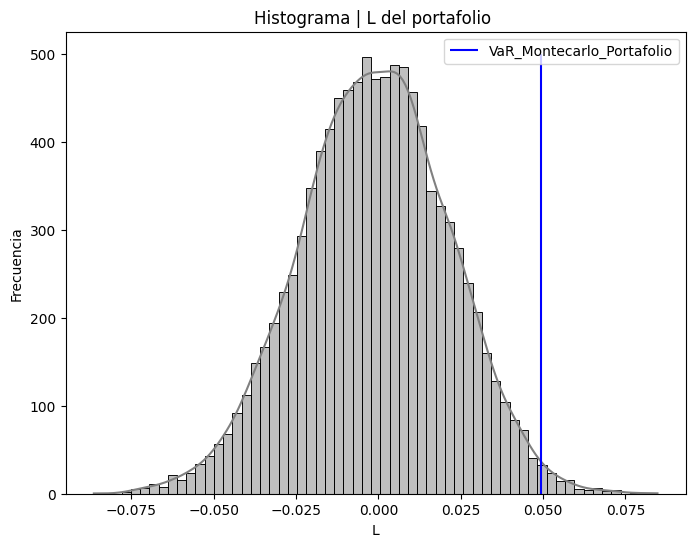

In [78]:
#Grafico de Histograma de L
plt.figure(figsize=(8,6))
sns.histplot(data=sim['L_Portafolio'], kde= True,color = 'gray')
plt.vlines(x=VaR_Montecarlo_port, ymin = 0, ymax=500, color = 'blue',label='VaR_Montecarlo_Portafolio')
plt.xlabel('L')
plt.ylabel('Frecuencia')
plt.title('Histograma | L del portafolio ')
plt.legend()
plt.show()